# Les 2: Data cleaning + lineaire regressie

In [69]:
from sklearn import linear_model
import csv
import numpy as np
regr = linear_model.LinearRegression()
import matplotlib.pyplot as plt

In [70]:
def SetUpData(File):
    print(File)
    GeslachtVal = []
    LengteVal = []
    MaatVal = []
    File
    for regel in File:
        try:
            if regel[0] != "NA" and regel[1] != "NA" and regel[2] != "NA" and float(regel[1]) < 280 and int(regel[2]) < 75 and float(regel[1]) > 50:
                LengteVal.append(float(regel[1]))
                MaatVal.append(int(regel[2]))
                GeslachtVal.append(str(regel[0]))
            else:
                print("FallOff")
        except:
            continue
            
    print(GeslachtVal[0])
    print(LengteVal[0])
    print(MaatVal[0])

    Gwaarden_lr = []
    for x in GeslachtVal:
        Gwaarden_lr.append([x])
    Lwaarden_lr = []
    for x in LengteVal:
        Lwaarden_lr.append([x])
    Mwaarden_lr = []
    for x in MaatVal:
        Mwaarden_lr.append([x])
    

    return Gwaarden_lr, Lwaarden_lr, Mwaarden_lr, GeslachtVal, LengteVal, MaatVal

In [71]:
csvSchoenen = csv.reader(open("schoenmaatlengte.csv", "r"))
Gwaarden, Lwaarden, Mwaarden, G, L, M = SetUpData(csvSchoenen)

print(Gwaarden)
print(Lwaarden)
print(Mwaarden)

vrouw
160.0
40
[['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['man'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['man'], ['vrouw'], ['man'], ['vrouw'], ['vrouw'], ['vrouw'], ['man'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['man'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['vrouw'], ['man'], ['man'], ['vrouw']]
[[160.0], [171.0], [174.0], [176.0], [195.0], [157.0], [160.0], [178.0], [168.0], [171.0], [165.0], [175.0], [163.0], [158.0], [159.0], [183.0], [155.0], [172.0], [164.0], [158.0], [174.0], [164.0], [168.0], [168.0], [163.0], [160.0], [183.0], [161.0], [162.0], [165.0], [164.0], [161.0], [163.0], [169.0], [171.0], [163.0], [159.0], [180.0], [168.0], [170.0], [168.0], [180.0], [183.0], [170.0]]
[[40], [39], [39], [40], [46], [37], [38], [39], [38], [41], [39], [44], [38], [37], [38], [44], [37], [39], [39], [3

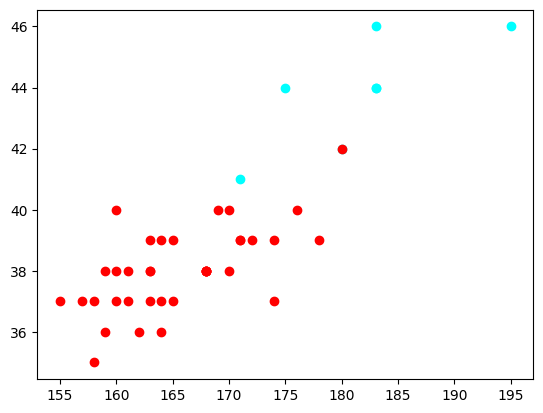

In [72]:

colorsM = [(0.0,1.0,1.0)]
colorsV = [(1.0,0.0,0.0)]

VL, VM, ML, MM = [], [], [], []

for i in range(len(G)):
    if G[i] == "vrouw":
        VL.append(L[i])
        VM.append(M[i])
    else:
        ML.append(L[i])
        MM.append(M[i])
         
plt.scatter(ML, MM, c=colorsM)
plt.scatter(VL, VM, c=colorsV)
plt.show()

In [73]:
def frequentieTabel(listToUse):
    Tabel = {}
    for item in listToUse:
        if item in Tabel:
            Tabel[item] += 1
        else:
            Tabel[item] = 1
    return Tabel

{'vrouw': 37, 'man': 7}
{160.0: 3, 171.0: 2, 174.0: 2, 176.0: 1, 157.0: 1, 178.0: 1, 168.0: 5, 165.0: 2, 163.0: 4, 158.0: 2, 159.0: 2, 155.0: 1, 172.0: 1, 164.0: 3, 161.0: 2, 162.0: 1, 169.0: 1, 180.0: 1, 170.0: 2}
{40: 4, 39: 8, 37: 9, 38: 11, 35: 1, 36: 3, 42: 1}
{195.0: 1, 171.0: 1, 175.0: 1, 183.0: 3, 180.0: 1}
{46: 2, 41: 1, 44: 3, 42: 1}


<BarContainer object of 2 artists>

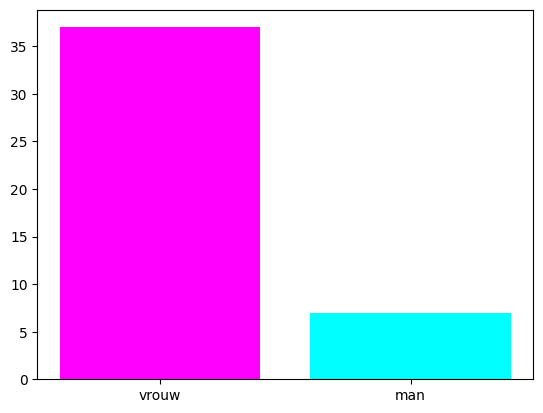

In [74]:
Ftabel = frequentieTabel(G)
print(Ftabel)
print(frequentieTabel(VL))
print(frequentieTabel(VM))
print(frequentieTabel(ML))
print(frequentieTabel(MM))

vals, numbahs = [], []
for key in Ftabel:
    vals.append(key)
    numbahs.append(Ftabel[key])

NewColors = [[1.0,0.0,1.0],[0.0,1.0,1.0]]
plt.bar(vals, height=numbahs, color=NewColors)



In [75]:
def pas_aan_voor_LR(lister):
    xwaarden_lr = []
    for x in lister:
        xwaarden_lr.append([x])

    return xwaarden_lr

In [78]:
def accuracy(voorspellingen, antwoorden):
    correct = 0
    for i in range(len(voorspellingen)):
        if voorspellingen[i] == antwoorden[i]:
            correct += 1

    print(str((correct/len(voorspellingen))*100)+"%")

In [79]:
testSet = csv.reader(open("test_set.csv", "r"))
GwaardenTest, LwaardenTest, MwaardenTest, GTest, LTest, MTest = SetUpData(testSet)

regr.fit(pas_aan_voor_LR(VL), VM)

VLTest, VMTest, MLTest, MMTest = [], [], [], []

for i in range(len(GTest)):
    if GTest[i] == "vrouw":
        VLTest.append(LTest[i])
        VMTest.append(MTest[i])
    else:
        MLTest.append(LTest[i])
        MMTest.append(MTest[i])

prediction = regr.predict(pas_aan_voor_LR(VL))

accuracy(prediction, VMTest)

FallOff
FallOff
FallOff
FallOff
FallOff
FallOff
vrouw
172.0
39
0.0%
